In [1]:
import sys
sys.path.append("/Users/rq.aita/Códigos/scripts")
sys.path.append("/home/ufpr/Documentos/GitHub/scripts")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import hydrology as hydro
import settings_plot

# Exercício 1

Na tabela a seguir, são apresentados os registros dos totais anuais de precipitação em duas estações próximas, X e Y, no período 1943-76. Deseja-se utilizar esses dados para efetuar o balanço hídrico em nível anual na região em que estão localizadas as estações. Solicita-se efetuar o preenchimento de todos os valores não disponíveis no período mediante regressão linear (exercício extraído de Tucci, 1997).

| Ano  | X (mm) | Y (mm) | Ano  | X (mm) | Y (mm) |
|------|--------|--------|------|--------|--------|
| 1943 |        | 1497   | 1960 | 1656   |        |
| 1944 |        | 1243   | 1961 | 2167   | 1678   |
| 1945 |        | 1359   | 1962 |        | 2048   |
| 1946 | 1505   | 1493   | 1963 | 1981   | 1771   |
| 1947 | 1634   | 1559   | 1964 | 1551   | 1191   |
| 1948 | 1775   | 1671   | 1965 | 1781   | 1572   |
| 1949 | 1421   | 1533   | 1966 | 1965   | 1666   |
| 1950 | 1619   |        | 1967 | 1342   | 1012   |
| 1951 | 1304   | 1214   | 1968 | 841    | 1064   |
| 1952 | 1640   | 1384   | 1969 | 1205   | 1349   |
| 1953 | 1569   |        | 1970 | 1287   | 1541   |
| 1954 | 2209   | 2158   | 1971 | 1509   | 1539   |
| 1955 | 1393   | 1371   | 1972 | 1664   |        |
| 1956 |        | 2035   | 1973 | 2021   |        |
| 1957 | 2090   | 2229   | 1974 | 1906   |        |
| 1958 | 2311   | 2189   | 1975 | 1776   |        |
| 1959 | 1638   | 1553   | 1976 | 1925   |        |

## Resolução

### Entrada

In [2]:
e_01_data = pd.read_excel("files/l_02_01.xlsx", index_col="Ano")

# Período em comum das estações
e_01_data_comum = e_01_data[~e_01_data.isnull().any(axis=1)]

# Anos com falha em X ou Y
e_01_falha_y = e_01_data["X (mm)"][e_01_data["Y (mm)"].isnull()]
e_01_falha_x = e_01_data["Y (mm)"][e_01_data["X (mm)"].isnull()]

### Ajuste para preenchimento de Y

Regressão na forma $Y = a X + b$, com $a$ e $b$ estimados pelo método dos mínimos quadrados

In [3]:
e_01_x = e_01_data_comum["X (mm)"].to_numpy()
e_01_y = e_01_data_comum["Y (mm)"].to_numpy()

e_01_ay, e_01_by, _ = hydro.reg_linear(e_01_x, e_01_y)

R2 = 0.724
Ajuste obtido: Y = 0.752 X +  321.852


In [4]:
e_01_prev_y = e_01_ay * e_01_falha_y + e_01_by
e_01_prev_y = e_01_prev_y.rename("Y (mm)")
e_01_falha_y = pd.DataFrame(e_01_falha_y)
e_01_falha_y["Y (mm)"] = e_01_prev_y
e_01_falha_y.round()

,X (mm),Y (mm)
Ano,,
1950,1619.0,1539.0
1953,1569.0,1502.0
1960,1656.0,1567.0
1972,1664.0,1573.0
1973,2021.0,1841.0
1974,1906.0,1755.0
1975,1776.0,1657.0
1976,1925.0,1769.0


### Ajuste para preenchimento de X

Regressão na forma $X = a Y + b$, com $a$ e $b$ estimados pelo método dos mínimos quadrados

In [5]:
e_01_ax, e_01_bx, _ = hydro.reg_linear(e_01_y, e_01_x)

R2 = 0.724
Ajuste obtido: Y = 0.963 X +  144.361


In [6]:
e_01_prev_x = e_01_ax * e_01_falha_x + e_01_bx
e_01_prev_x = e_01_prev_x.rename("X (mm)")
e_01_falha_x = pd.DataFrame(e_01_falha_x)
e_01_falha_x["X (mm)"] = e_01_prev_x
e_01_falha_x.round()

,Y (mm),X (mm)
Ano,,
1943,1497.0,1586.0
1944,1243.0,1341.0
1945,1359.0,1453.0
1956,2035.0,2104.0
1962,2048.0,2116.0


### Gráfico

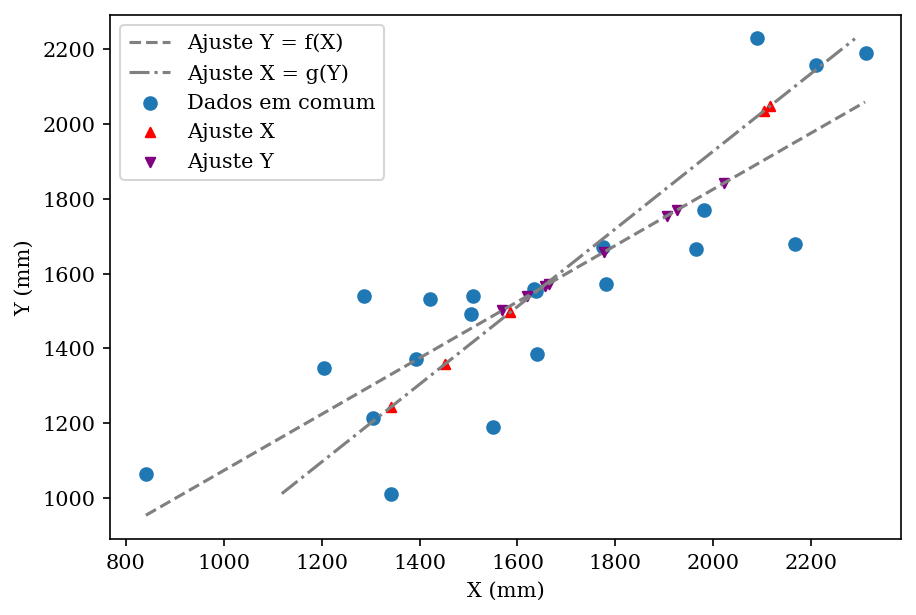

In [7]:
xx = np.arange(e_01_data.min()["X (mm)"], e_01_data.max()["X (mm)"])
yx = e_01_ay * xx + e_01_by

yy = np.arange(e_01_data.min()["Y (mm)"], e_01_data.max()["Y (mm)"])
xy = e_01_ax * yy + e_01_bx

fig, ax = plt.subplots(constrained_layout=True)

# Medições
ax.scatter(e_01_x, e_01_y, label="Dados em comum")

# Ajuste
ax.plot(xx, yx, label="Ajuste Y = f(X)", color="gray", linestyle="--")
ax.plot(xy, yy, label="Ajuste X = g(Y)", color="gray", linestyle="-.")

# Preenchimentos
e_01_falha_x.plot.scatter(
    x='X (mm)', y='Y (mm)', ax=ax, label="Ajuste X", color="red", marker="^",
)
e_01_falha_y.plot.scatter(
    x='X (mm)', y='Y (mm)', ax=ax, label="Ajuste Y", color="purple", marker="v"
)

ax.legend()
fig.savefig("figures/l_02_01.png", format="png", dpi=300)
plt.show()

In [8]:
del xx, yx, xy, yy

# Exercício 2

A equação indicada a seguir, descreve as relações i-d-f de chuvas em um certo local. Utilizando o método do Bureau of Reclamation, determine os hietogramas de projeto para um sistema de esgotos pluviais da região próxima do local, para duas bacias com tempos de concentração iguais a 40 e 90 minutos, respectivamente. Utilizar tempo de recorrência de 10 anos.

$$i = \dfrac{1200 T^{0,12}}{(t + 20)^{0,70}}$$

onde $t$ em minutos, $T$ em anos e $i$ em mm/h (exercício adaptado de Tucci, 1997).

## Resolução

Para satisfazer a condição do método de existir um número mínimo de 6 durações até o tempo de concentração, escolheu-se adotar incrementos de 5 minutos. Uma vez que a bacia com tempo de concentração de 90 minutos inclui as considerações para a de 40, se considerará apenas a primeira.

### Entrada

In [74]:
e_02_d1 = 5  # minutos
e_02_d2 = 10  # minutos
e_02_tr = 10  # anos
e_02_tc1 = 40  # minutos
e_02_tc2 = 90  # minutos
e_02_idf = lambda t, tr : 1200 * tr**0.12 / (t + 20)**0.70  # curva IDF

### Aplicação do método

In [75]:
e_02_resultado1 = hydro.hietograma_usbr(e_02_tc1, e_02_d1, e_02_tr, e_02_idf)
e_02_resultado1

,i,P,p,p_reord
5,166.197023,13.849752,13.849752,5.262797
10,146.283845,24.380641,10.530889,7.037200
15,131.320829,32.830207,8.449566,8.449566
20,119.602223,39.867408,7.037200,13.849752
25,110.136808,45.890337,6.022929,10.530889
30,102.306268,51.153134,5.262797,6.022929
35,95.703399,55.826983,4.673849,4.673849
40,90.048269,60.032180,4.205197,4.205197


In [76]:
e_02_resultado2 = hydro.hietograma_usbr(e_02_tc2, e_02_d2, e_02_tr, e_02_idf)
e_02_resultado2

,i,P,p,p_reord
10,146.283845,24.380641,24.380641,6.259261
20,119.602223,39.867408,15.486767,8.879046
30,102.306268,51.153134,11.285726,11.285726
40,90.048269,60.032180,8.879046,24.380641
50,80.837452,67.364544,7.332364,15.486767
60,73.623804,73.623804,6.259261,7.332364
70,67.797158,79.096684,5.472880,5.472880
80,62.976895,83.969194,4.872509,4.872509
90,58.912353,88.368529,4.399335,4.399335


In [90]:
e_02_resultado3 = hydro.hietograma_usbr(e_02_tc2, e_02_d1, e_02_tr, e_02_idf)
e_02_resultado3

,i,P,p,p_reord
5,166.197023,13.849752,13.849752,5.262797
10,146.283845,24.380641,10.530889,7.037200
15,131.320829,32.830207,8.449566,8.449566
20,119.602223,39.867408,7.037200,13.849752
25,110.136808,45.890337,6.022929,10.530889
30,102.306268,51.153134,5.262797,6.022929
35,95.703399,55.826983,4.673849,4.673849
40,90.048269,60.032180,4.205197,4.205197
45,85.141617,63.856213,3.824033,3.824033
50,80.837452,67.364544,3.508331,3.508331


### Gráfico

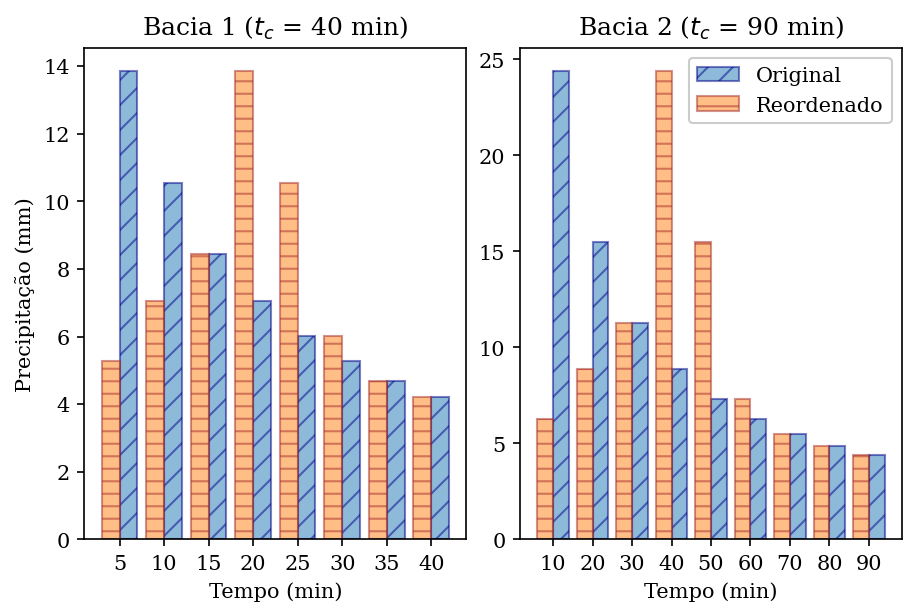

In [126]:
fig, ax = plt.subplots(1, 2, constrained_layout=True)

# Bacia 1 - tempo de concentração de 40 minutos (d = 5 min)
ax[0].bar(np.arange(8) + 0.2, e_02_resultado1["p"], 
       width=0.4, alpha=0.5, label=r"Original", hatch="//", edgecolor="darkblue"
      )
ax[0].bar(np.arange(8) - 0.2, e_02_resultado1["p_reord"], 
       width=0.4, alpha=0.5, label=r"Reordenado", hatch="--", edgecolor="brown"
      )
ax[0].set_xticks(np.arange(8))
ax[0].set_xticklabels(e_02_resultado1.index)
ax[0].set_xlabel("Tempo (min)")
ax[0].set_title("Bacia 1 ($t_c$ = 40 min)")

# Bacia 2 - tempo de concentração de 90 minutos (d = 10 min)
ax[1].bar(np.arange(9) + 0.2, e_02_resultado2["p"], 
       width=0.4, alpha=0.5, label=r"Original", hatch="//", edgecolor="darkblue"
      )
ax[1].bar(np.arange(9) - 0.2, e_02_resultado2["p_reord"], 
       width=0.4, alpha=0.5, label=r"Reordenado", hatch="--", edgecolor="brown"
      )
ax[1].set_xticks(np.arange(9))
ax[1].set_xticklabels(e_02_resultado2.index)
ax[1].set_xlabel("Tempo (min)")
ax[1].set_title("Bacia 2 ($t_c$ = 90 min)")

ax[0].set_ylabel("Precipitação (mm)")
ax[1].legend(framealpha=1)
fig.savefig("figures/l_02_02.png", format="png", dpi=300)
plt.show()

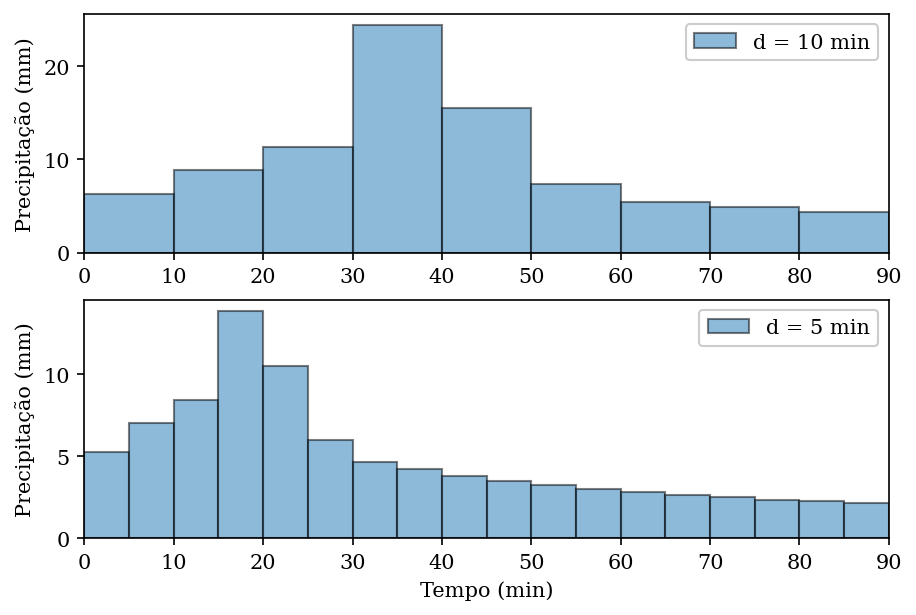

In [128]:
fig, ax = plt.subplots(2, 1, constrained_layout=True)

# Caso 1 - tempo de concentração de 90 minutos e duração de 10 minutos
ax[0].bar(np.arange(9)+0.5, e_02_resultado2["p_reord"],
          width=1, alpha=0.5, edgecolor="black", label="d = 10 min",
         )
ax[0].set_xticks(np.arange(10))
ax[0].set_xlim([0, 9])
ax[0].set_xticklabels([0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
ax[0].set_ylabel("Precipitação (mm)")
ax[0].legend(framealpha=1)

# Caso 2 - tempo de concentração de 90 minutos e duração de 5 minutos
ax[1].bar(np.arange(18)+0.5, e_02_resultado3["p_reord"],
          width=1, alpha=0.5, edgecolor="black", label="d = 5 min",
         )
ax[1].set_xticks(np.arange(0, 19, 2))
ax[1].set_xlim([0, 18])
ax[1].set_xticklabels([0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
ax[1].set_ylabel("Precipitação (mm)")
ax[1].set_xlabel("Tempo (min)")
ax[1].legend(framealpha=1)

fig.savefig("figures/l_02_02_comp.png", format="png", dpi=300)
plt.show()

In [135]:
e_02_resultado1.round(1).to_excel("e-02-1.xlsx")

# Exercício 3

Dada uma bacia hidrográfica de forma circular com 314,16 km2 de área, determinar a chuva média de um episódio pluvial pelo método das isoietas, sabendo que o total precipitado na posição central da bacia foi de 100 mm, o mapa das isoietas é formado por círculos concêntricos de 2, 4, 6, 8 e 10 km de raio, correspondentes, respectivamente, a 80, 60, 40, 20 e 0 mm (exercício extraído de Úmbria e Zandonai, 1996).

$$
    \bar P = \dfrac{1}{A} \left( \sum A_{i, i+1} \dfrac{P_i + P_{i+1}}{2} \right) = 0.4 \left[ \sum_{i=0}^{4} (2i + 1)(10 - 2i - 1) \right]
$$

In [12]:
e_03_p = 0.4 * sum(
    (2*i + 1) * (10 - 2*i - 1) for i in range(5)
)
e_03_p

34.0

# Exercício 4

Na verdade, a figura geométrica que produziu as isoietas do exercício anterior seria representada por uma série de cilindros concêntricos. Assim sendo, pode-se resolver o problema, imaginando-se que as isoietas são de milímetro em milímetro e não de 10 mm em 10 mm. Pode-se resolver, mais uma vez, com diferenças ainda menores entre as isoietas. No limite, qual o valor exato da precipitação média? (Supor que a variação da precipitação é linear) (exercício extraído de Úmbria e Zandonai, 1996).

# Exercício 5 e 6

Calcule novamente a evapotranspiração potencial mensal e anual do exercício resolvido na aula  09, utilizando as equações de Serra, dadas a seguir, para a avaliação dos parâmetros $I$ e $a$ do método de Thornthwaite.
$$
    I = \sum_{i=1}^{12} \left( 0,09 t_i^{\frac{3}{2}} \right) \ \ \ e \ \ \ a = 0,016I + 0,5
$$
Comparar os resultados obtidos em sala e os obtidos por você na solução do exercício. Procure explicar as diferenças encontradas (exercício adaptado de Úmbria e Zandonai, 1996). 

| Mês       | T(°C) | N(h) | Mês      | T(°C) | N(h) |
|-----------|-------|------|----------|-------|------|
| Janeiro   | 23,9  | 13,3 | Julho    | 16,9  | 10,9 |
| Fevereiro | 23,5  | 12,7 | Agosto   | 18,5  | 11,4 |
| Março     | 22,4  | 11,6 | Setembro | 20,3  | 12,0 |
| Abril     | 20,8  | 11,6 | Outubro  | 20,8  | 12,7 |
| Maio      | 17,0  | 11,0 | Novembro | 23,1  | 13,2 |
| Junho     | 16,0  | 10,7 | Dezembro | 23,0  | 13,6 |

Refaça o exemplo da aula 09 (método de Thornthwaite), substituindo a temperatura média mensal em cada mês pela temperatura média anual. Compare os resultados btidos com o exemplo resolvido na referida aula, relativamente às evapotranspirações médias mensais e a evapotranspiração média anual.

## Resolução

### Entradas

In [16]:
e_05_T = np.array([
    23.9, 23.5, 22.4, 20.8, 17. , 16. , 16.9, 18.5, 20.3, 20.8, 23.1, 23. ,
])
e_05_N = np.array([
    13.3, 12.7, 11.6, 11.6, 11. , 10.7, 10.9, 11.4, 12. , 12.7, 13.2, 13.6,
])

In [17]:
e_06_T = e_05_T.mean() * np.ones(12)

e_06_N = np.array([
    13.3, 12.7, 11.6, 11.6, 11. , 10.7, 10.9, 11.4, 12. , 12.7, 13.2, 13.6,
])

### Método de Thornthwaite

In [18]:
e_05_EVTp, e_05_I, e_05_a = hydro.thornthwaite(e_05_T, e_05_N, serra=True)  # eq. Serra
e_06_EVTp, e_06_I, e_06_a = hydro.thornthwaite(e_06_T, e_06_N)              # eq. padrão
e_05_EVTp_def, e_05_I_def, e_05_a_def = hydro.thornthwaite(e_05_T, e_05_N)  # T média

In [19]:
e_05_data = {
    "T (°C)" : e_05_T,
    "N (h)" : e_05_N,
    "EVTp (mm)" : e_05_EVTp.round(1),
}
e_05_data = pd.DataFrame(
    data=e_05_data, index=["Jan", "Fev", "Mar", "Abr", "Mai", "Jun",
                           "Jul", "Ago", "Set", "Out", "Nov", "Dez"]
)

In [20]:
print(e_05_data)
print("a =", e_05_a.round(2))
print("I =", e_05_I.round(2))

     T (°C)  N (h)  EVTp (mm)
Jan    23.9   13.3      114.8
Fev    23.5   12.7       95.5
Mar    22.4   11.6       87.3
Abr    20.8   11.6       72.2
Mai    17.0   11.0       46.2
Jun    16.0   10.7       38.2
Jul    16.9   10.9       45.2
Ago    18.5   11.4       57.2
Set    20.3   12.0       70.9
Out    20.8   12.7       81.7
Nov    23.1   13.2      102.6
Dez    23.0   13.6      108.2
a = 2.12
I = 101.02


In [21]:
e_06_data = {
    "T (°C)" : e_06_T.round(1),
    "N (h)" : e_06_N,
    "EVTp (mm)" : e_06_EVTp.round(1),
}
e_06_data = pd.DataFrame(
    data=e_06_data, index=["Jan", "Fev", "Mar", "Abr", "Mai", "Jun",
                           "Jul", "Ago", "Set", "Out", "Nov", "Dez"]
)

In [22]:
print(e_06_data)
print("a =", e_06_a.round(2))
print("I =", e_06_I.round(2))

     T (°C)  N (h)  EVTp (mm)
Jan    20.5   13.3       88.4
Fev    20.5   12.7       76.2
Mar    20.5   11.6       77.1
Abr    20.5   11.6       74.6
Mai    20.5   11.0       73.1
Jun    20.5   10.7       68.8
Jul    20.5   10.9       72.5
Ago    20.5   11.4       75.8
Set    20.5   12.0       77.2
Out    20.5   12.7       84.4
Nov    20.5   13.2       84.9
Dez    20.5   13.6       90.4
a = 2.23
I = 101.73


### Gráfico

In [ ]:
e_06_T = np.array([
    23.9, 23.5, 22.4, 20.8, 17. , 16. , 16.9, 18.5, 20.3, 20.8, 23.1, 23. ,
])
e_06_T = e_06_T.mean() * np.ones(12)

e_06_N = np.array([
    13.3, 12.7, 11.6, 11.6, 11. , 10.7, 10.9, 11.4, 12. , 12.7, 13.2, 13.6,
])

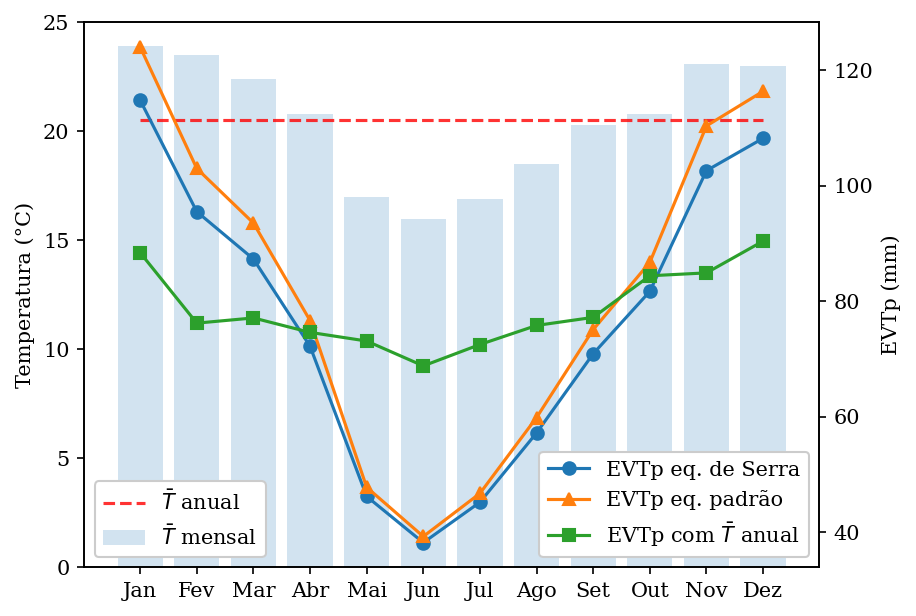

In [23]:
fig, ax_left = plt.subplots(constrained_layout=True)
ax_right = ax_left.twinx()

# Temperatura
ax_left.bar(range(12), e_05_data["T (°C)"], alpha=0.2, label=r"$\bar{T}$ mensal")
ax_left.plot(range(12), e_06_data["T (°C)"], alpha=0.8, label=r"$\bar{T}$ anual", color="red", linestyle="--")
ax_left.set_ylabel("Temperatura (°C)")
ax_left.set_ylim([0, 25])

# EVTp
e_05_data["EVTp (mm)"].plot(marker="o", ax=ax_right, label="EVTp eq. de Serra")
ax_right.plot(e_05_EVTp_def, marker="^", label="EVTp eq. padrão")
e_06_data["EVTp (mm)"].plot(marker="s", ax=ax_right, label=r"EVTp com $\bar{T}$ anual")

ax_right.set_xticks(range(12))
ax_right.set_xticklabels(e_05_data.index)
ax_right.set_ylabel("EVTp (mm)")

ax_left.legend(framealpha=1, loc="lower left")
ax_right.legend(framealpha=1, loc="lower right")
fig.savefig("figures/l_02_05e06.png", format="png", dpi=300)
plt.show()